In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import sparse
import scipy.sparse.linalg as spla
Bi = 0.1
A_r = 20
m = (A_r*Bi)**2
T_mid = []

In [2]:
p = 0.5
T_Exact = 60*((np.cosh(m*p)+((np.sinh(m*p))*(Bi/m)))/(np.cosh(m)+((np.sinh(m))*(Bi/m))))+300
T_Exact

308.2589518204364

In [3]:
def generate_les(n,m,Bi):
    
    def initialize_variables(n):
        I = np.zeros(3*(n-1))
        J = np.zeros(3*(n-1))
        V = np.zeros(3*(n-1))
        B = np.zeros(n)
        return I, J, V, B

    def dx(n):
        dx = 1/(n-1)
        return dx

    def initialize_coeffs(I,J,V,n,dx,m):
        for i in range(1,n-1):
            k = 3*(i-1) + np.linspace(1,4,3)
            I[int(k[0]):int(k[-1])] = int(i)
            J[int(k[0]):int(k[-1])] = (i-1, i, i+1)
            V[int(k[0]):int(k[-1])] = (1, -(2+((m*dx)**2)), 1)
        
    def left_bc (I,J,V,B,n,dx):
        k = np.linspace(0,1,2)
        I[0] = 0
        J[0] = 0
        V[0] = 1
        B[0] = 1
    
    def right_bc (I,J,V,n,dx,m,Bi):
        k = (3*(n-1)-2) + np.linspace(0,1,2)
        I[int(k[0]):int(k[-1])+1] = n-1
        J[int(k[0]):int(k[-1])+1] = (n-2, n-1)
        V[int(k[0]):int(k[-1])+1] = (-1, 1+Bi*dx)
        
    bc = (left_bc, right_bc)
    
    dx = dx(n)
    lbc, rbc = bc
    I,J,V,B = initialize_variables(n)
    initialize_coeffs(I,J,V,n,dx,m)
    lbc(I,J,V,B,n,dx)
    rbc(I,J,V,n,dx,m,Bi)
    return sparse.csc_matrix((V,(I,J)),shape=(n,n)), B


def steady_1D_conduction(n,m,Bi):
    dz = np.linspace(0,1,n)
    A,B = generate_les(n,m,Bi)
    
    def counter(rk=None):
        counter.niter += 1
        print("# iter {:3d}, residual = {}".format(counter.niter,str(rk)))
    A2= A
    M2 = spla.spilu(A2,fill_factor=10) # fill ratio upper bound
    M_x = lambda x: M2.solve(x)
    M = spla.LinearOperator((n,n), M_x)
    counter.niter = 0
    theta = spla.gmres(A2,B,tol=1e-6,M=M,callback=counter)
    theta = theta[0]
    return dz, theta

# n = 9

In [4]:
n = 9
sol = np.zeros(n)
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 3.3247515482185333e-16


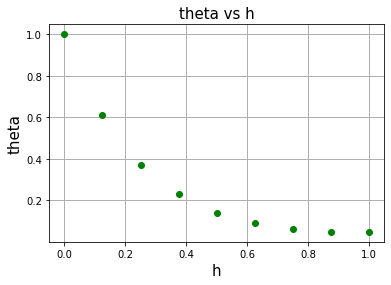

In [5]:
dx1 = np.linspace(0,1,len(sol))
plt.plot(dx1, sol, 'og', linewidth = 2.5)
plt.title('theta vs h', fontsize = 15)
plt.xlabel('h', fontsize = 15)
plt.ylabel('theta', fontsize = 15)
plt.grid(b=True, which='major', linewidth=1, linestyle='-')
plt.grid(b=True, which='minor', linewidth=1, linestyle='-')
plt.show()

# n = 65

In [6]:
n = 65
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 3.815611710431799e-15


# n = 129

In [7]:
n = 129
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 3.6059967686854876e-15


# n = 513

In [8]:
n = 513
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 3.9039418599414436e-13


# n = 1025

In [9]:
n = 1025
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 7.145321841176012e-13


# n = 4097

In [10]:
n = 4097
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 7.772704505203053e-12


# n = 16385

In [11]:
n = 16385
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 1.95478355519472e-10


# n = 65538

In [12]:
n = 65538
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 8.670997064055407e-09


# n = 131075

In [13]:
n = 131075
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 5.89006508946052e-08


# n = 524297

In [14]:
n = 524297
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 5.447997406319187e-06


# n = 1048594

In [15]:
n = 1048594
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 4.203077895491509e-05


# n = 2097186

In [16]:
n = 2097186
sol = steady_1D_conduction(n,m,Bi)[1]
i = int((n-1)/2)
T_mid.append(sol[i])

# iter   1, residual = 0.00014046131710504365


In [17]:
for i in range (len(T_mid)):
    T_mid[i] = (T_mid[i]*60)+300
T_mid

[308.52785645153614,
 308.2706885233689,
 308.2640544940089,
 308.260084401065,
 308.25950620738854,
 308.25908818627323,
 308.2589857726083,
 308.25920371433045,
 308.2589560716976,
 308.2589537196271,
 308.2589538416244,
 308.2586948323201]

In [18]:
E_t = np.zeros(len(T_mid))
E_t = abs(T_Exact - T_mid)
E_s = []
for i in range(1,len(T_mid)):
    if (i==len(T_mid)):
        break
    else:
        E_s.append(abs(T_mid[i]-T_mid[i-1]))

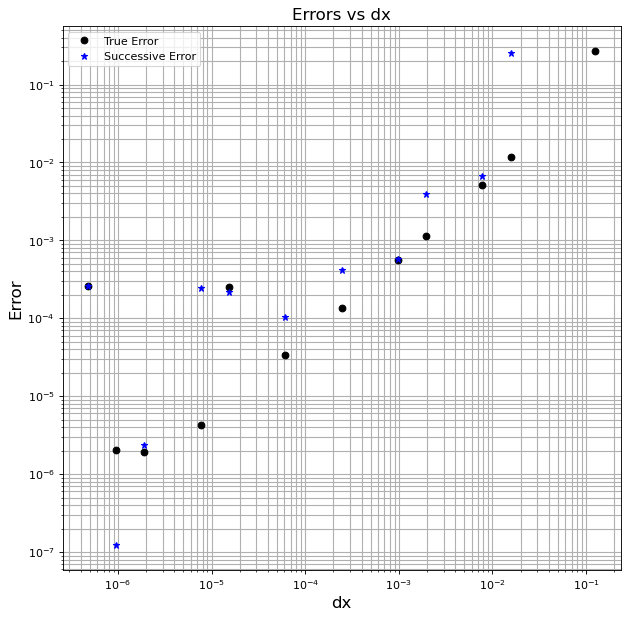

In [21]:
from matplotlib.pyplot import figure

figure(figsize=(9, 9), dpi=80)


dx1 = [1/8, 1/64, 1/128, 1/512, 1/1024, 1/4096, 1/16384, 1/65537, 1/131074, 1/524296, 1/1048593, 1/2097186]
dx2 = [1/64, 1/128, 1/512, 1/1024, 1/4096, 1/16384, 1/65537, 1/131074, 1/524296, 1/1048593, 1/2097186]
plt.loglog(dx1, E_t, 'ok', dx2, E_s, '*b', linewidth = 2.5)
plt.title('Errors vs dx', fontsize = 15)
plt.xlabel('dx', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.grid(b=True, which='major', linewidth=1, linestyle='-')
plt.grid(b=True, which='minor', linewidth=1, linestyle='-')
plt.legend(( 'True Error', 'Successive Error'), loc = 0)
plt.show()